<a href="https://colab.research.google.com/github/BiswajitPaul7/Airbnb-Bookings-Analysis-Capstone-Project/blob/main/Airbnb_Bookings_Analysis_Capstone_Project_Solution.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ***What is Airbnb?***
***Airbnb, Inc. is an American company that operates an online marketplace for lodging, primarily homestays for vacation rentals, and tourism activities. Based in San Francisco, California, the platform is accessible via website and mobile app.***

## <b> Since 2008, guests and hosts have used Airbnb to expand on traveling possibilities and present a more unique, personalized way of experiencing the world. Today, Airbnb became one of a kind service that is used and recognized by the whole world. Data analysis on millions of listings provided through Airbnb is a crucial factor for the company. These millions of listings generate a lot of data - data that can be analyzed and used for security, business decisions, understanding of customers' and providers' (hosts) behavior and performance on the platform, guiding marketing initiatives, implementation of innovative additional services and much more. </b>

## <b>This dataset has around 49,000 observations in it with 16 columns and it is a mix between categorical and numeric values. </b>

## <b> Explore and analyze the data to discover key understandings (not limited to these) such as : 
* What can we learn about different hosts and areas?
* What can we learn from predictions? (ex: locations, prices, reviews, etc)
* Which hosts are the busiest and why?
* Is there any noticeable difference of traffic among different areas and what could be the reason for it? </b>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# ***Importing Libraries***

In [2]:
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

In [3]:
import warnings
warnings.filterwarnings("ignore")

# ***Importing the dataset***

In [4]:
airbnb_df = pd.read_csv('/content/drive/MyDrive/Airbnb EDA Capstone Project 1/Airbnb NYC 2019.csv')

***Dataset Overview***

In [5]:
airbnb_df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


***Checking the total number of rows and columns***

In [6]:
airbnb_df.shape
print(f'The shape of the dataset is {airbnb_df.shape}')

The shape of the dataset is (48895, 16)


***Checking type of every column in the dataset***

In [7]:
airbnb_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

***id: listing id***

***name: listing name***

***host_id: host id***

***host_name: host name***

***neighbourhood_group: NYC borough***

***neighbourhood: NYC neighborhood***

***latitude: listing latitude***

***longitude: listing longitude***

***room_type: type of listing (Entire home/apt, Private room, Shared room)***

***price: listing price***

***minimum_nights: required minimum nights stay***

***number_of_reviews: total number of reviews***

***last_review: date of last review***

***reviews per month: average number of reviews per month***

***calculated_host_listings_count: total number of listings for this host***

***availability_365: number of days listing is available out of 365***





***The describe() method is used for calculating some statistical data like percentile, mean and std of the numerical values in Series or DataFrame***

In [8]:
#Examine Continous Variable
airbnb_df.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,4.889500e+04,4.889500e+04,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,38843.000000,48895.000000,48895.000000
mean,1.901714e+07,6.762001e+07,40.728949,-73.952170,152.720687,7.029962,23.274466,1.373221,7.143982,112.781327
std,1.098311e+07,7.861097e+07,0.054530,0.046157,240.154170,20.510550,44.550582,1.680442,32.952519,131.622289
min,2.539000e+03,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,9.471945e+06,7.822033e+06,40.690100,-73.983070,69.000000,1.000000,1.000000,0.190000,1.000000,0.000000
50%,1.967728e+07,3.079382e+07,40.723070,-73.955680,106.000000,3.000000,5.000000,0.720000,1.000000,45.000000
75%,2.915218e+07,1.074344e+08,40.763115,-73.936275,175.000000,5.000000,24.000000,2.020000,2.000000,227.000000
max,3.648724e+07,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


# ***Data wrangling and Data cleaning***

***Handling missing values(Null values)***

In [9]:
airbnb_df.isnull().sum()

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

***Dropping the unnecessary columns***

In [10]:
#Filling missing values
airbnb_df['name'].fillna('Not_mapped', inplace = True)
airbnb_df['host_name'].fillna('Not_mapped', inplace =  True)

In [11]:
#Dropping the unncessary columns.
airbnb_df = airbnb_df.drop(['last_review','reviews_per_month'], axis =1)
airbnb_df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,1,0


In [12]:
#All the null values has been removed from the dataset.
missing_values_count = np.sum(airbnb_df.isnull())
missing_values_count

id                                0
name                              0
host_id                           0
host_name                         0
neighbourhood_group               0
neighbourhood                     0
latitude                          0
longitude                         0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
calculated_host_listings_count    0
availability_365                  0
dtype: int64

In [13]:
total_cells = np.product(airbnb_df.shape)
total_missing =  missing_values_count.sum()

#calculating the percentage of missing values
percentage_missing = np.round((total_missing / total_cells) * 100, 2)
print("Percentage of missing values in the dataset:", percentage_missing)

Percentage of missing values in the dataset: 0.0


## ***Get Correlation between different variables***

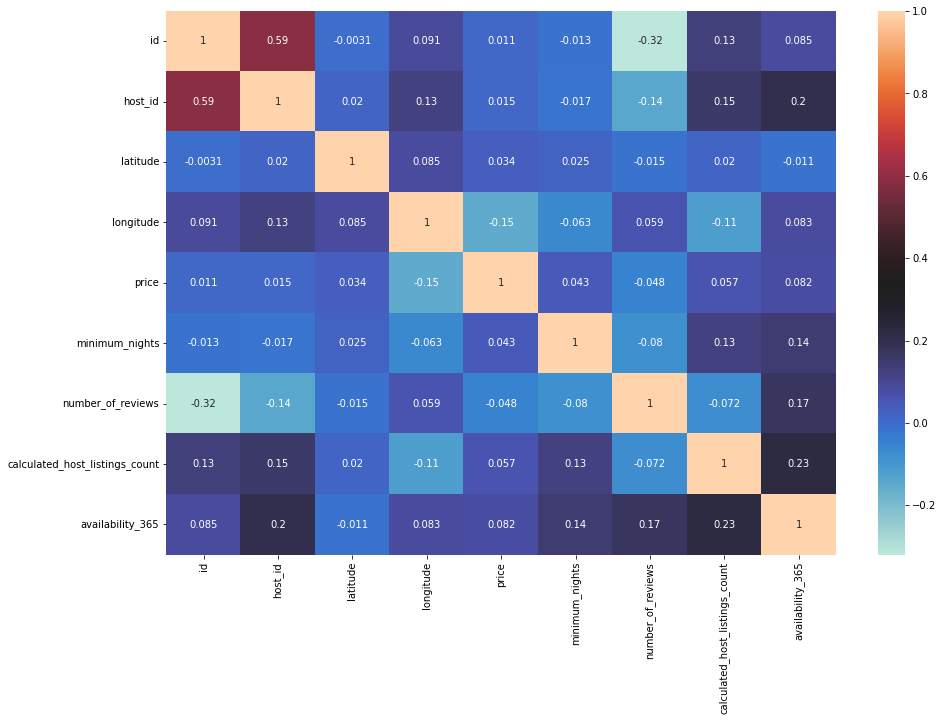

In [14]:
#Viewing correlation of the numerical values
plt.figure(figsize=(15,10))
air_corr = airbnb_df.corr()
sns.heatmap(air_corr,annot=True, cmap="icefire")

***From the above heatmap, we can understand that there is no strong correlation between the different variables***

In [15]:
airbnb_df.columns 

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'calculated_host_listings_count',
       'availability_365'],
      dtype='object')

***Earlier we drop down the "last_review" and "reviews_per_month'" columns due to more than 10,000 null values, now we are not doing any analysis specifically on "latitude" and "longitude", we're also removing these variables as well.***

In [16]:
#Dropping the unncessary columns.
modified_df = airbnb_df[['id','name','host_id','host_name','neighbourhood_group','neighbourhood','room_type','price','minimum_nights',
             'number_of_reviews','calculated_host_listings_count','availability_365']]

In [17]:
#Checking head of dataset after dropping the column latitude and longitude
modified_df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,room_type,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,Private room,149,1,9,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,Entire home/apt,225,1,45,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,Private room,150,3,0,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,Entire home/apt,89,1,270,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,Entire home/apt,80,10,9,1,0


# ***1. What can we learn about different hosts and areas?***

In [18]:
hosts_areas =modified_df.groupby(['host_name','neighbourhood_group'])['calculated_host_listings_count'].max().reset_index()
hosts_areas.sort_values(by='calculated_host_listings_count', ascending=False).head(5)

,host_name,neighbourhood_group,calculated_host_listings_count
13221,Sonder (NYC),Manhattan,327
1833,Blueground,Brooklyn,232
1834,Blueground,Manhattan,232
7275,Kara,Manhattan,121
7478,Kazuya,Brooklyn,103


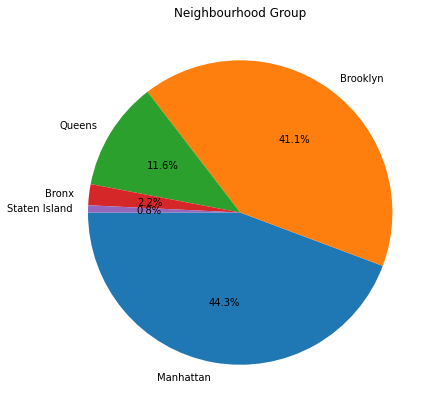

In [19]:
#Creating the pie chart to analyse the neighbourhood group values
plt.figure(figsize=(13,7))
plt.title("Neighbourhood Group")
g = plt.pie(modified_df['neighbourhood_group'].value_counts(), labels=modified_df['neighbourhood_group'].value_counts().index,autopct='%1.1f%%', startangle=180)
plt.show()

# ***2.What can we learn from predictions? (ex: locations, prices, reviews, etc)***

In [20]:
areas_reviews = modified_df.groupby(['neighbourhood_group'])['number_of_reviews'].max().reset_index()
areas_reviews

,neighbourhood_group,number_of_reviews
0,Bronx,321
1,Brooklyn,488
2,Manhattan,607
3,Queens,629
4,Staten Island,333


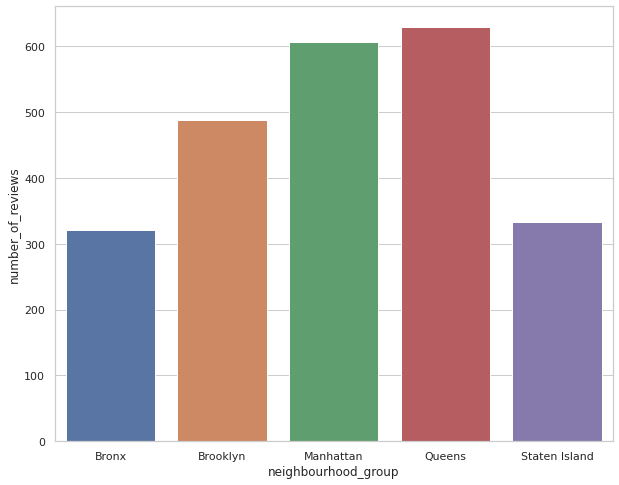

In [21]:
plt.figure(figsize=(10,8))
sns.set_theme(style="whitegrid")
ax = sns.barplot(x='neighbourhood_group', y='number_of_reviews',data=areas_reviews)

In [22]:
price_area = modified_df.groupby(['price'])['number_of_reviews'].max().reset_index()
price_area.head(5)

,price,number_of_reviews
0,0,95
1,10,93
2,11,113
3,12,8
4,13,9


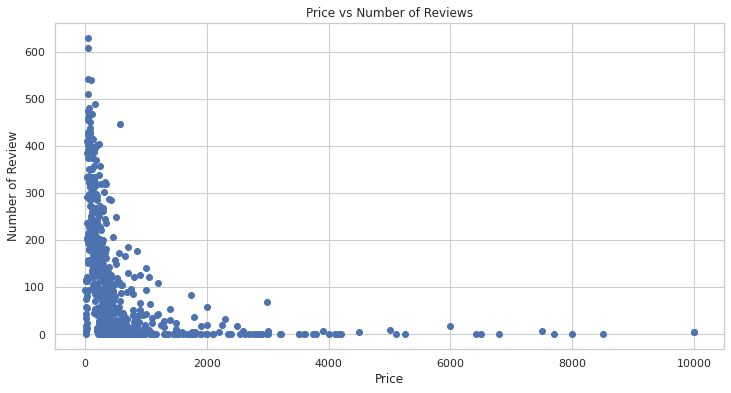

In [23]:
#creating the scatter plot
area = price_area['price']
price = price_area['number_of_reviews']

fig = plt.figure(figsize = (12, 6))
plt.scatter(area, price)
 
plt.xlabel("Price")
plt.ylabel("Number of Review")
plt.title("Price vs Number of Reviews")
plt.show()

# ***3.Which hosts are the busiest and why?***

In [24]:
#Creating a Report on host name and reviews on it 
busiest_hosts = modified_df.groupby(['host_name','host_id','room_type'])['number_of_reviews'].max().reset_index()
busiest_hosts = busiest_hosts.sort_values(by='number_of_reviews', ascending=False).head(10)
busiest_hosts

,host_name,host_id,room_type,number_of_reviews
10279,Dona,47621202,Private room,629
17708,Jj,4734398,Private room,607
25566,Maya,37312959,Private room,543
6235,Carol,2369681,Private room,540
8947,Danielle,26432133,Private room,510
3950,Asa,12949460,Entire home/apt,488
37766,Wanda,792159,Private room,480
22499,Linda,2680820,Private room,474
8625,Dani,42273,Entire home/apt,467
2942,Angela,23591164,Private room,466


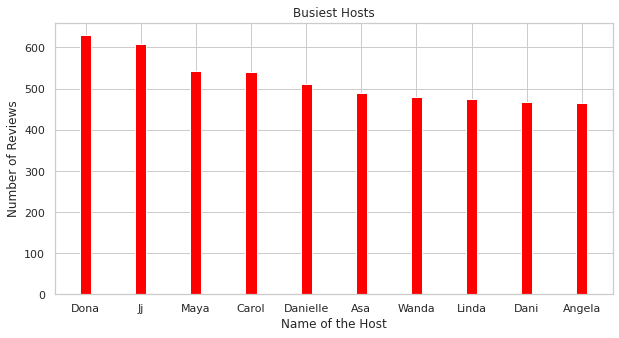

In [25]:
name = busiest_hosts['host_name']
reviews = busiest_hosts['number_of_reviews']

fig = plt.figure(figsize = (10, 5))
 
#creating the bar plot
plt.bar(name, reviews, color ='red',width = 0.2)
plt.xlabel("Name of the Host")
plt.ylabel("Number of Reviews")
plt.title("Busiest Hosts")
plt.show()

***From the above data vizualization the busiest host are :***

***a)Dona***

***b)Ji***

***c)Maya***

***d)Carol***

***Because these rooms are listed under private room and entire home which is prefered by no of people.*** 

# ***4. Is there any noticeable difference of traffic among different areas and what could be the reason for it?***

In [26]:
traffic_areas = modified_df.groupby(['neighbourhood_group','room_type'])['minimum_nights'].count().reset_index()
traffic_areas = traffic_areas.sort_values(by='minimum_nights', ascending=False)
traffic_areas

,neighbourhood_group,room_type,minimum_nights
6,Manhattan,Entire home/apt,13199
4,Brooklyn,Private room,10132
3,Brooklyn,Entire home/apt,9559
7,Manhattan,Private room,7982
10,Queens,Private room,3372
9,Queens,Entire home/apt,2096
1,Bronx,Private room,652
8,Manhattan,Shared room,480
5,Brooklyn,Shared room,413
0,Bronx,Entire home/apt,379


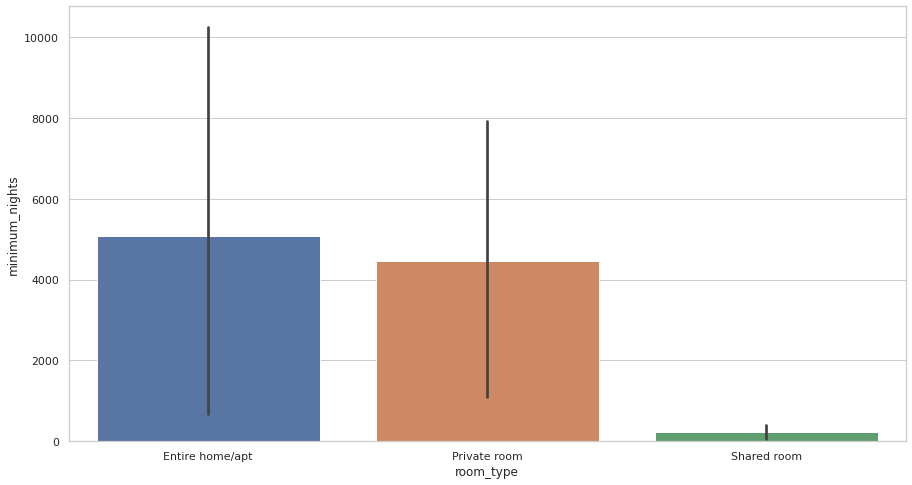

In [27]:
plt.figure(figsize=(15,8))
sns.set_theme(style="whitegrid")
ax = sns.barplot(x='room_type', y='minimum_nights',data=traffic_areas)

***From the Above Analysis We can Say that People are preferring Entire home/apt or Private room which are present in Manhattan, Brooklyn, Queens and people are preferring listings which are less in price.***

# ***Key Findings:***

***1. From the top 10 observations according to highest calculated_host_listing_count, we can found that 7 results are from Manhattan area, 2 from Brookyln and 1 from Queens. So it is clear that Airbnb is a popular business model in Manhattan. The host who has most host_listings are sonder(NYC).***

***2. From top 10 list of busiest hosts we can see that 8 results are from private room type.***

***3. The name of the busiest host is Dona from Queens are having 629 reviews.***

***4. Even though shared rooms are much cheaper as compared to private rooms most reviews are for private rooms which means that most number of people prefer private rooms over other room type probably couples or small group of people who need more privacy and prefer budget friendly stay will go for private room, so we can say tha most of thr AirBnb custombers are from this category.***

***5. 'Manhattan' is the area having highest median price, followed by Brooklyn. So we can say that most costly hosts are situated in 'Manhattan'.***

# ***Conclusion:***
***Airbnb dataset-2019 appeared to be a very rich dataset with a variety of columns that allowed us to do deep data exploration on each significant column presented. First, we have found hosts that take good advantage of the Airbnb platform and provide the most listings; we found that our top host has 327 listings. After that, we proceeded with analyzing boroughs and neighborhood listing densities and what areas were more popular than another. From the entire analysis on airbnb bookings analysis,Our assumptions before analysis went totally different after getting results from the analysis. The whole EDA process gave very fascinating results and insights that will be helpful for business development and expansion, budget allocations and focussing on things people prefer.***

***1. The people who prefer to stay in Entire home or Apartment they are going to stay bit longer in that particular Neighbourhood only.***

***2. The people who prefer to stay in Private room they won't stay longer as compared to Home or Apartment.***

***3. Most people prefer to pay less price.***

***4. If there are more number of Reviews for particular Neighbourhood group that means that place is a tourist place.***

***5. If people are not staying more then one night means they are travellers.***
